<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/notebooks/SML_application_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set(style="darkgrid", color_codes=True)

In [166]:
np.random.seed(21)

beta0 = 15
beta1 = 0.3

In [167]:
x = np.random.uniform(0,100, 500)
y = beta0 + (beta1*x) + np.random.normal(0, 5, 500)

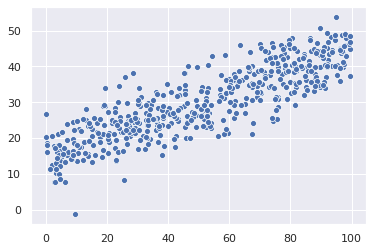

In [168]:
sns.scatterplot(x = x, y = y)

In [169]:
X = sm.add_constant(x)

mod = sm.OLS(y, X)
res = mod.fit()

print(res.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.737    
Dependent Variable: y                AIC:                3042.5723
Date:               2020-09-17 14:58 BIC:                3051.0015
No. Observations:   500              Log-Likelihood:     -1519.3  
Df Model:           1                F-statistic:        1401.    
Df Residuals:       498              Prob (F-statistic): 7.86e-147
R-squared:          0.738            Scale:              25.617   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      15.1501     0.4609   32.8699   0.0000   14.2445   16.0556
x1          0.2918     0.0078   37.4254   0.0000    0.2765    0.3071
------------------------------------------------------------------
Omnibus:              1.174         Durbin-Watson:           1.898
Pro

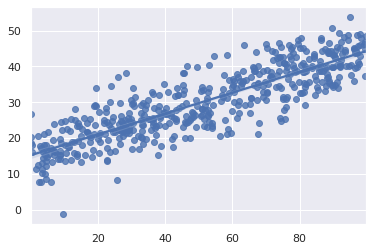

In [170]:
sns.regplot(x = x, y = y )

In [171]:
y_pred = res.predict(X)

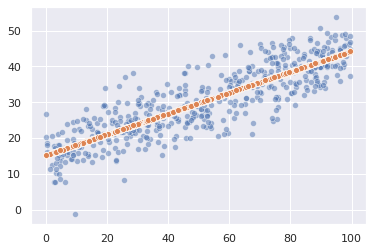

In [172]:
sns.scatterplot(x = x, y = y, alpha=0.5)
sns.scatterplot(x = x, y = y_pred)

In [173]:
error_reg = y - y_pred

In [174]:
np.mean(error_reg)

-4.760636329592672e-16

In [175]:
np.sqrt(np.mean(error_reg**2))

5.051240204155663

In [176]:
np.random.seed(42)

In [177]:
x_new = np.random.uniform(0,100, 500)
y_new = beta0 + (beta1*x_new) + np.random.normal(0, 5, 500)

In [178]:
X_new = sm.add_constant(x_new)

In [179]:
y_pred_new = res.predict(X_new)

In [180]:
error_reg_new = y_new - y_pred_new

In [181]:
np.sqrt(np.mean(error_reg_new**2))

5.061466857807731

In [182]:
np.random.seed(21)

In [183]:
beta1 = 5

x = np.random.normal(0, 1, 500)
y = np.random.binomial(1, 1/(1+np.exp(-(beta1*x))))

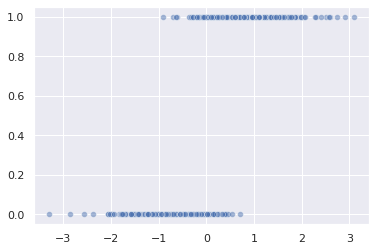

In [184]:
sns.scatterplot(x = x, y = y, alpha=0.5)

In [185]:
X = sm.add_constant(x)

In [186]:
mod = sm.GLM(y, X, sm.families.Binomial())

In [187]:
res = mod.fit()

In [188]:
print(res.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            254.2953  
Link Function:      logit            BIC:            -2844.5795
Dependent Variable: y                Log-Likelihood: -125.15   
Date:               2020-09-17 15:05 LL-Null:        -346.43   
No. Observations:   500              Deviance:       250.30    
Df Model:           1                Pearson chi2:   362.      
Df Residuals:       498              Scale:          1.0000    
Method:             IRLS                                       
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const     0.0541     0.1609    0.3363   0.7366   -0.2613   0.3695
x1        4.6371     0.4403   10.5322   0.0000    3.7742   5.5000



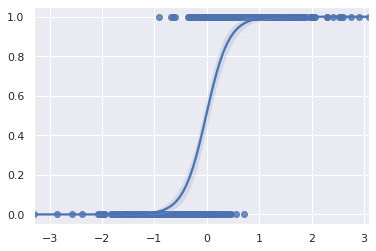

In [189]:
sns.regplot(x, y, logistic=True)

In [190]:
y_pred = res.predict(X)
y_pred_class = np.round(y_pred)

In [191]:
data_class = pd.DataFrame({'x':x, 
                           'y':y, 
                           'predicted' : y_pred, 
                           'predicted_class' : y_pred_class})

In [192]:
data_class.head()

,x,y,predicted,predicted_class
0,-0.051964,0,0.453426,0.0
1,-0.111196,0,0.386630,0.0
2,1.041797,1,0.992498,1.0
3,-1.256739,0,0.003099,0.0
4,0.745388,1,0.970987,1.0


In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [194]:
cm_log = confusion_matrix(y, y_pred_class)

In [195]:
cm_log

array([[217,  27],
       [ 28, 228]])

In [196]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5b42cefc88>)

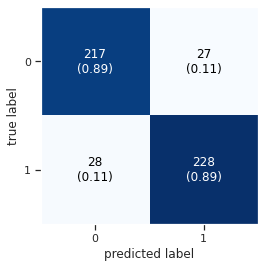

In [197]:
plot_confusion_matrix(conf_mat=cm_log,
                                show_absolute=True,
                                show_normed=True)

In [198]:
print(classification_report(y,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       244
           1       0.89      0.89      0.89       256

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [ ]:
from sklearn.datasets import load_boston

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
load_boston()['feature_names']

In [ ]:
data = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])

In [ ]:
data['y'] = load_boston()['target']

In [ ]:
data.describe()

In [ ]:
corr = data.corr()

In [ ]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap=cmap)

In [ ]:
sns.pairplot(data, corner=True, diag_kind='kde')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor(n_estimators=25)

In [ ]:
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 

scorer = make_scorer(mean_squared_error)

In [ ]:
parameters_el = {'alpha':[0.1, 0.5, 1.0], 'l1_ratio':[0.1, 0.5, 0.75]}

In [ ]:
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_el, parameters_el, scoring=scorer)

In [ ]:
grid_fit = grid_obj.fit(X, y)

In [ ]:
# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 30, 40]}

In [ ]:
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(model_rf, parameters_rf, scoring=scorer)

In [ ]:
grid_fit = grid_obj.fit(X, y)

In [ ]:
# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

In [ ]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
penguins.head()

In [ ]:
penguins.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X = penguins.iloc[:,2:6]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
y = penguins.iloc[:, 0]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
true_penguins = labelencoder_y.inverse_transform(y_test)

predicted_penguins = labelencoder_y.inverse_transform(model.predict(X_test))

In [ ]:
df = pd.DataFrame({'true_penguins': true_penguins, 'predicted_penguins': predicted_penguins}) 

pd.crosstab(df.true_penguins, df.predicted_penguins)

In [ ]:
print(classification_report(true_penguins,predicted_penguins, labels=labelencoder_y.classes_))

In [ ]:
penguins.head()

In [ ]:
y = penguins['culmen_length_mm']

In [ ]:
X_dum = penguins.species_short.str.get_dummies()

In [ ]:
X = pd.concat([penguins.iloc[:,4:6], X_dum], axis=1)

In [ ]:
X.iloc[:,0:2] = StandardScaler().fit_transform(X.iloc[:,0:2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
model_ols = LinearRegression()
model_rf = RandomForestRegressor()

In [ ]:
model_ols.fit(X_train, y_train)

In [ ]:
model_rf.fit(X_train, y_train)

In [ ]:
model_ols.score(X_test, y_test)

In [ ]:
model_rf.score(X_test, y_test)

In [ ]:
model_ols.score(X_train, y_train)

In [ ]:
model_rf.score(X_train, y_train)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
y_pred_ols = model_ols.predict(X_test)

In [ ]:
sns.scatterplot(y_test, y_pred_ols)

In [ ]:
sns.scatterplot(y_test, y_pred_rf)